In [45]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
tf.__version__

'2.0.0-beta1'

In [2]:
data = pd.read_csv('./dataset/PRSA_data_2010.1.1-2014.12.31.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
No       43824 non-null int64
year     43824 non-null int64
month    43824 non-null int64
day      43824 non-null int64
hour     43824 non-null int64
pm2.5    41757 non-null float64
DEWP     43824 non-null int64
TEMP     43824 non-null float64
PRES     43824 non-null float64
cbwd     43824 non-null object
Iws      43824 non-null float64
Is       43824 non-null int64
Ir       43824 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [4]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
data['pm2.5'].isna().sum()

2067

In [6]:
data = data.iloc[24:].fillna(method='ffill')

In [7]:
data['pm2.5'].isna().sum()

0

In [8]:
data['tm'] = data.apply(
    lambda x: datetime.datetime(
        year=x['year'], month=x['month'], day=x['day'], hour=x['hour']),
    axis=1
)

In [9]:
data.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,tm
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [10]:
data.drop(columns=['No', 'year', 'month', 'day', 'hour'], inplace=True)

In [11]:
data.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,tm
24,129.0,-16,-4.0,1020.0,SE,1.79,0,0,2010-01-02 00:00:00
25,148.0,-15,-4.0,1020.0,SE,2.68,0,0,2010-01-02 01:00:00
26,159.0,-11,-5.0,1021.0,SE,3.57,0,0,2010-01-02 02:00:00
27,181.0,-7,-5.0,1022.0,SE,5.36,1,0,2010-01-02 03:00:00
28,138.0,-7,-5.0,1022.0,SE,6.25,2,0,2010-01-02 04:00:00


In [12]:
data = data.set_index('tm')

In [13]:
data.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [14]:
data = data.join(
    pd.get_dummies(data.cbwd)
)

In [15]:
del data['cbwd']

In [16]:
data.head()

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,NE,NW,SE,cv
tm,,,,,,,,,,,
2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,1.79,0,0,0,0,1,0
2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,2.68,0,0,0,0,1,0
2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,3.57,0,0,0,0,1,0
2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,5.36,1,0,0,0,1,0
2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,6.25,2,0,0,0,1,0


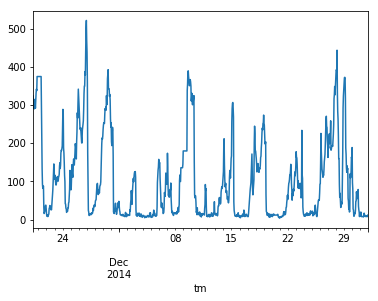

In [17]:
data['pm2.5'][-1000:].plot()

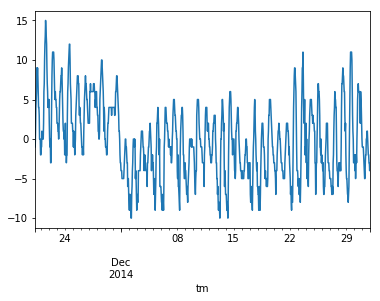

In [18]:
data['TEMP'][-1000:].plot()

In [19]:
seq_length = 5 * 24
delay = 24

In [20]:
ndata = []
for i in range(len(data) - seq_length - delay):
    ndata.append(data.iloc[i: i + seq_length + delay])

In [21]:
ndata[0].shape

(144, 11)

In [22]:
ndata = np.array([df.values for df in ndata])

In [23]:
ndata.shape

(43656, 144, 11)

In [24]:
np.random.shuffle(ndata)

In [25]:
x = ndata[:, :5*24, :]

In [26]:
y = ndata[:, -1, 0]

In [27]:
y.shape

(43656,)

In [28]:
split_b = int(ndata.shape[0] * 0.8)

In [29]:
train_x = x[:split_b]
train_y = y[:split_b]
test_x = x[split_b:]
test_y = y[split_b:]

In [30]:
train_x.shape, train_y.shape

((34924, 120, 11), (34924,))

In [31]:
test_x.shape, test_y.shape

((8732, 120, 11), (8732,))

In [32]:
mean = train_x.mean(axis=0)
std = train_x.std(axis=0)

In [33]:
std

array([[91.32743835, 14.4049638 , 12.16034344, ...,  0.46654594,
         0.47720846,  0.41055073],
       [91.18687005, 14.40660478, 12.16309293, ...,  0.46638017,
         0.47752072,  0.41007217],
       [90.87637977, 14.40836114, 12.16331998, ...,  0.46686514,
         0.47708291,  0.41021192],
       ...,
       [91.2557809 , 14.38452492, 12.13698167, ...,  0.46667823,
         0.47662242,  0.41185799],
       [91.39841325, 14.37797574, 12.13526146, ...,  0.46708429,
         0.47674027,  0.41140389],
       [91.12126163, 14.38321598, 12.13227998, ...,  0.46736798,
         0.47689389,  0.41070987]])

In [34]:
train_x = (train_x - mean) / std
test_x = (test_x - mean) / std

上述式子是对数据做标准化

标准化：（数据 - 平均值）除以 标准差 
        
        (xi−μ)/σ 其中μ指的是样本的均值，σ指的是样本的标准差。
        
归一化：在标准化的前提下多了一个限制 将数据限制在 [0, 1]  (xi−min(x))/(max(x)−min(x))


方差：
方差是各个数据与平均数之差的平方的平均数

标准差：
方差开根号。

In [35]:
batch_size = 128

In [36]:
model = tf.keras.Sequential()

In [37]:
model.add(layers.Flatten(input_shape=(train_x.shape[1:])))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1))

In [39]:
model.compile(optimizer='adam',
             loss='mse',
             metrics=['mae'])

In [40]:
history = model.fit(train_x, train_y, batch_size=batch_size, epochs=50, 
                    validation_data=(test_x, test_y))

Train on 34924 samples, validate on 8732 samples
Epoch 1/50
34924/34924 [==============================] - 1s 38us/sample - loss: 10729.3071 - mae: 74.3374 - val_loss: 8707.5838 - val_mae: 69.0148
Epoch 2/50
34924/34924 [==============================] - 1s 23us/sample - loss: 8049.0560 - mae: 66.6046 - val_loss: 7884.6602 - val_mae: 64.9081
Epoch 3/50
34924/34924 [==============================] - 1s 22us/sample - loss: 7358.1316 - mae: 63.3886 - val_loss: 7416.2854 - val_mae: 62.9455
Epoch 4/50
34924/34924 [==============================] - 1s 21us/sample - loss: 6957.3669 - mae: 61.3947 - val_loss: 7165.0034 - val_mae: 61.7343
Epoch 5/50
34924/34924 [==============================] - 1s 21us/sample - loss: 6712.8248 - mae: 60.1803 - val_loss: 7012.6413 - val_mae: 61.4808
Epoch 6/50
34924/34924 [==============================] - 1s 23us/sample - loss: 6521.4736 - mae: 59.2671 - val_loss: 6906.2463 - val_mae: 60.4900
Epoch 7/50
34924/34924 [==============================] - 1s 22us/sa

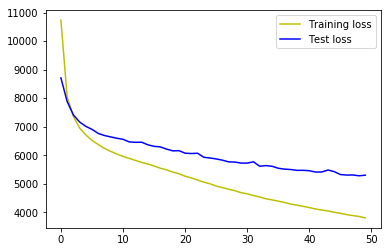

In [43]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

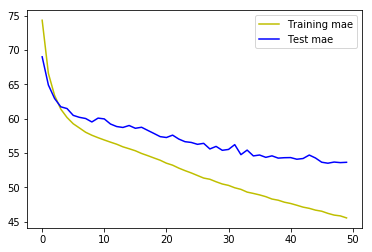

In [44]:
plt.plot(history.epoch, history.history.get('mae'), 'y', label='Training mae')
plt.plot(history.epoch, history.history.get('val_mae'), 'b', label='Test mae')
plt.legend()

# LSTM

In [46]:
model = keras.Sequential()
model.add(layers.LSTM(32, input_shape=(train_x.shape[1:])))
model.add(layers.Dense(1))

In [47]:
model.compile(optimizer=keras.optimizers.Adam(),
             loss='mae')

In [48]:
history = model.fit(train_x, train_y, batch_size=128, 
                    epochs=200, validation_data=(test_x, test_y))

Train on 34924 samples, validate on 8732 samples
Epoch 1/200
34924/34924 [==============================] - 8s 234us/sample - loss: 87.8106 - val_loss: 82.1864
Epoch 2/200
34924/34924 [==============================] - 3s 72us/sample - loss: 79.4758 - val_loss: 77.2125
Epoch 3/200
34924/34924 [==============================] - 2s 69us/sample - loss: 75.2943 - val_loss: 73.6844
Epoch 4/200
34924/34924 [==============================] - 2s 68us/sample - loss: 72.2060 - val_loss: 71.0602
Epoch 5/200
34924/34924 [==============================] - 2s 69us/sample - loss: 69.8972 - val_loss: 69.1643
Epoch 6/200
34924/34924 [==============================] - 2s 69us/sample - loss: 68.1794 - val_loss: 67.6878
Epoch 7/200
34924/34924 [==============================] - 2s 69us/sample - loss: 66.6300 - val_loss: 66.1228
Epoch 8/200
34924/34924 [==============================] - 2s 70us/sample - loss: 65.1867 - val_loss: 64.7061
Epoch 9/200
34924/34924 [==============================] - 2s 69us/sam

34924/34924 [==============================] - 2s 71us/sample - loss: 55.9722 - val_loss: 58.2403
Epoch 75/200
34924/34924 [==============================] - 2s 70us/sample - loss: 56.2583 - val_loss: 56.6742
Epoch 76/200
34924/34924 [==============================] - 2s 69us/sample - loss: 54.9950 - val_loss: 56.1182
Epoch 77/200
34924/34924 [==============================] - 2s 70us/sample - loss: 54.3283 - val_loss: 56.6480
Epoch 78/200
34924/34924 [==============================] - 2s 71us/sample - loss: 54.1748 - val_loss: 55.3172
Epoch 79/200
34924/34924 [==============================] - 2s 70us/sample - loss: 53.5313 - val_loss: 54.9003
Epoch 80/200
34924/34924 [==============================] - 2s 70us/sample - loss: 53.0600 - val_loss: 54.8054
Epoch 81/200
34924/34924 [==============================] - 2s 70us/sample - loss: 52.9074 - val_loss: 55.0800
Epoch 82/200
34924/34924 [==============================] - 2s 72us/sample - loss: 53.5382 - val_loss: 54.0380
Epoch 83/200
3

34924/34924 [==============================] - 2s 68us/sample - loss: 53.3447 - val_loss: 53.3599
Epoch 148/200
34924/34924 [==============================] - 2s 69us/sample - loss: 51.3750 - val_loss: 52.6867
Epoch 149/200
34924/34924 [==============================] - 2s 69us/sample - loss: 50.8962 - val_loss: 52.4965
Epoch 150/200
34924/34924 [==============================] - 2s 69us/sample - loss: 50.6296 - val_loss: 53.7854
Epoch 151/200
34924/34924 [==============================] - 2s 69us/sample - loss: 55.5568 - val_loss: 56.4154
Epoch 152/200
34924/34924 [==============================] - 2s 69us/sample - loss: 53.3286 - val_loss: 55.1526
Epoch 153/200
34924/34924 [==============================] - 2s 68us/sample - loss: 52.2254 - val_loss: 53.9095
Epoch 154/200
34924/34924 [==============================] - 2s 70us/sample - loss: 52.1634 - val_loss: 53.5119
Epoch 155/200
34924/34924 [==============================] - 2s 69us/sample - loss: 52.4846 - val_loss: 54.1202
Epoch 

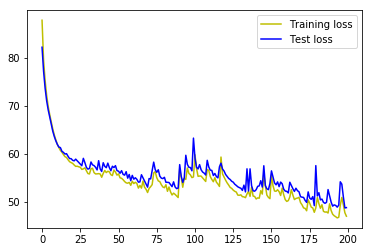

In [49]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()

In [50]:
model = keras.Sequential()
model.add(layers.LSTM(32, input_shape=(train_x.shape[1:]), return_sequences=True))
model.add(layers.LSTM(32, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dense(1))

In [51]:
lr_reduce = keras.callbacks.ReduceLROnPlateau('val_loss', patience=3, 
                                              factor=0.5, min_lr=0.000001)

In [52]:
model.compile(
    optimizer='adam',
    loss='mae',
    metrics=['mae']
)

In [53]:
history = model.fit(train_x, train_y,
                   batch_size=batch_size,
                   epochs=150,
                   callbacks=[lr_reduce],
                   validation_data=(test_x, test_y))

Train on 34924 samples, validate on 8732 samples
Epoch 1/150
34924/34924 [==============================] - 8s 223us/sample - loss: 87.4257 - mae: 87.4257 - val_loss: 82.8181 - val_mae: 82.8181
Epoch 2/150
34924/34924 [==============================] - 5s 147us/sample - loss: 80.2104 - mae: 80.2103 - val_loss: 77.9746 - val_mae: 77.9746
Epoch 3/150
34924/34924 [==============================] - 5s 145us/sample - loss: 76.0830 - mae: 76.0830 - val_loss: 74.4638 - val_mae: 74.4638
Epoch 4/150
34924/34924 [==============================] - 5s 146us/sample - loss: 72.9752 - mae: 72.9753 - val_loss: 71.7749 - val_mae: 71.7749
Epoch 5/150
34924/34924 [==============================] - 5s 143us/sample - loss: 70.5885 - mae: 70.5885 - val_loss: 69.7780 - val_mae: 69.7780
Epoch 6/150
34924/34924 [==============================] - 5s 144us/sample - loss: 68.8173 - mae: 68.8173 - val_loss: 68.3457 - val_mae: 68.3457
Epoch 7/150
34924/34924 [==============================] - 5s 144us/sample - loss

Epoch 57/150
34924/34924 [==============================] - 5s 139us/sample - loss: 56.7324 - mae: 56.7324 - val_loss: 57.5979 - val_mae: 57.5979
Epoch 58/150
34924/34924 [==============================] - 5s 139us/sample - loss: 56.5478 - mae: 56.5478 - val_loss: 57.4351 - val_mae: 57.4351
Epoch 59/150
34924/34924 [==============================] - 5s 139us/sample - loss: 56.4252 - mae: 56.4252 - val_loss: 57.3072 - val_mae: 57.3072
Epoch 60/150
34924/34924 [==============================] - 5s 139us/sample - loss: 56.2992 - mae: 56.2992 - val_loss: 57.1868 - val_mae: 57.1868
Epoch 61/150
34924/34924 [==============================] - 5s 140us/sample - loss: 56.1850 - mae: 56.1850 - val_loss: 57.1422 - val_mae: 57.1422
Epoch 62/150
34924/34924 [==============================] - 5s 140us/sample - loss: 56.1149 - mae: 56.1149 - val_loss: 57.0728 - val_mae: 57.0728
Epoch 63/150
34924/34924 [==============================] - 5s 140us/sample - loss: 56.0484 - mae: 56.0483 - val_loss: 57.02

34924/34924 [==============================] - 5s 140us/sample - loss: 55.3754 - mae: 55.3754 - val_loss: 56.4254 - val_mae: 56.4254
Epoch 114/150
34924/34924 [==============================] - 5s 139us/sample - loss: 55.3707 - mae: 55.3707 - val_loss: 56.4203 - val_mae: 56.4203
Epoch 115/150
34924/34924 [==============================] - 5s 139us/sample - loss: 55.3653 - mae: 55.3653 - val_loss: 56.4157 - val_mae: 56.4157
Epoch 116/150
34924/34924 [==============================] - 5s 141us/sample - loss: 55.3606 - mae: 55.3605 - val_loss: 56.4110 - val_mae: 56.4110
Epoch 117/150
34924/34924 [==============================] - 5s 139us/sample - loss: 55.3560 - mae: 55.3560 - val_loss: 56.4096 - val_mae: 56.4096
Epoch 118/150
34924/34924 [==============================] - 5s 141us/sample - loss: 55.3516 - mae: 55.3516 - val_loss: 56.4041 - val_mae: 56.4041
Epoch 119/150
34924/34924 [==============================] - 5s 140us/sample - loss: 55.3471 - mae: 55.3470 - val_loss: 56.4015 - va

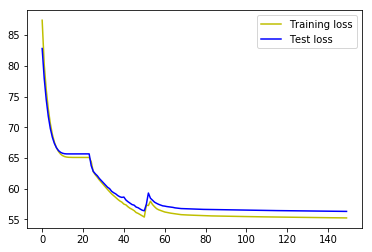

In [54]:
plt.plot(history.epoch, history.history.get('loss'), 'y', label='Training loss')
plt.plot(history.epoch, history.history.get('val_loss'), 'b', label='Test loss')
plt.legend()